In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
df = pd.read_csv("C://Users/sunee/Downloads/bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [7]:
df.size

76857

In [8]:
#shape of dataset
df.shape

(4521, 17)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
df.min()

age                19
job            admin.
marital      divorced
education     primary
default            no
balance         -3313
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            4
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
dtype: object

In [11]:
df.mean()

age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64

In [12]:
df.max()

age               87
job          unknown
marital       single
education    unknown
default          yes
balance        71188
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        3025
campaign          50
pdays            871
previous          25
poutcome     unknown
y                yes
dtype: object

In [13]:
df.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no


In [14]:
#informations of dataset and used memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [15]:
# Name of columns in the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
# Values in the dataset
df.columns.value_counts()

age          1
day          1
poutcome     1
previous     1
pdays        1
campaign     1
duration     1
month        1
contact      1
job          1
loan         1
housing      1
balance      1
default      1
education    1
marital      1
y            1
dtype: int64

In [17]:
#checking Null Values in the dataset
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#checking the sum of the Dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

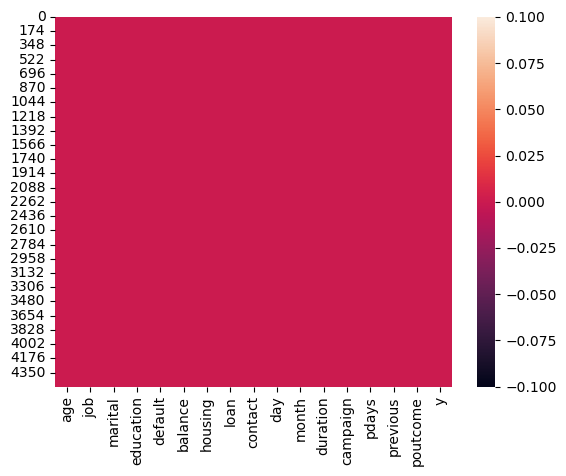

In [19]:
#checking Null values by heatmap
sns.heatmap(df.isnull())

In [20]:
#checking any space in the dataset
(df==' ?')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
(df == ' ?').sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [22]:
(df == ' ')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
(df == ' ').sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
#checking any null value in the target column
df[df['y'] == '']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [25]:
df[df['y'] == ''].index

Int64Index([], dtype='int64')

In [26]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [27]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [29]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


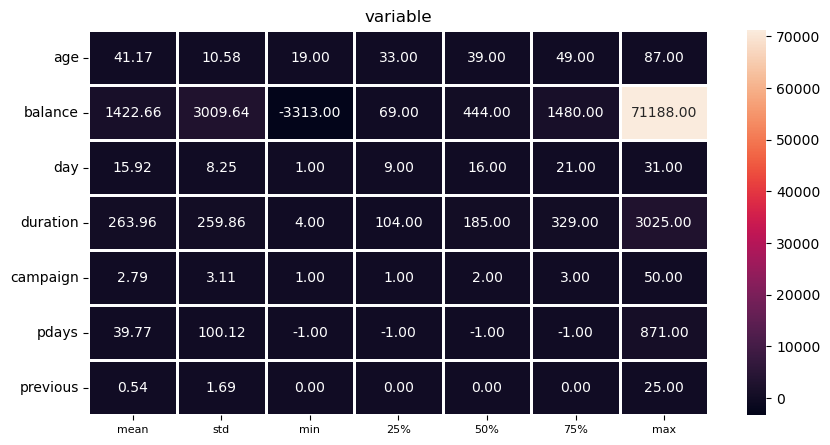

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=14)
plt.xticks(fontsize=8)
plt.title('variable')
plt.show()

In [31]:
# Name of columns in the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Data Cleaning And Preprocessing

In [32]:
df['age'].value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

In [33]:
df['age'].unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64)

no     4000
yes     521
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='Count'>

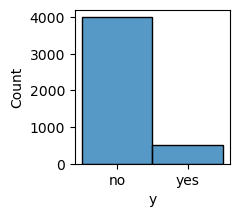

In [34]:
#Histplot for "tenure" column
print(df["y"].value_counts())
plt.figure(figsize=(2,2))
sns.histplot(x='y',data=df,bins=73)

<AxesSubplot:xlabel='age', ylabel='count'>

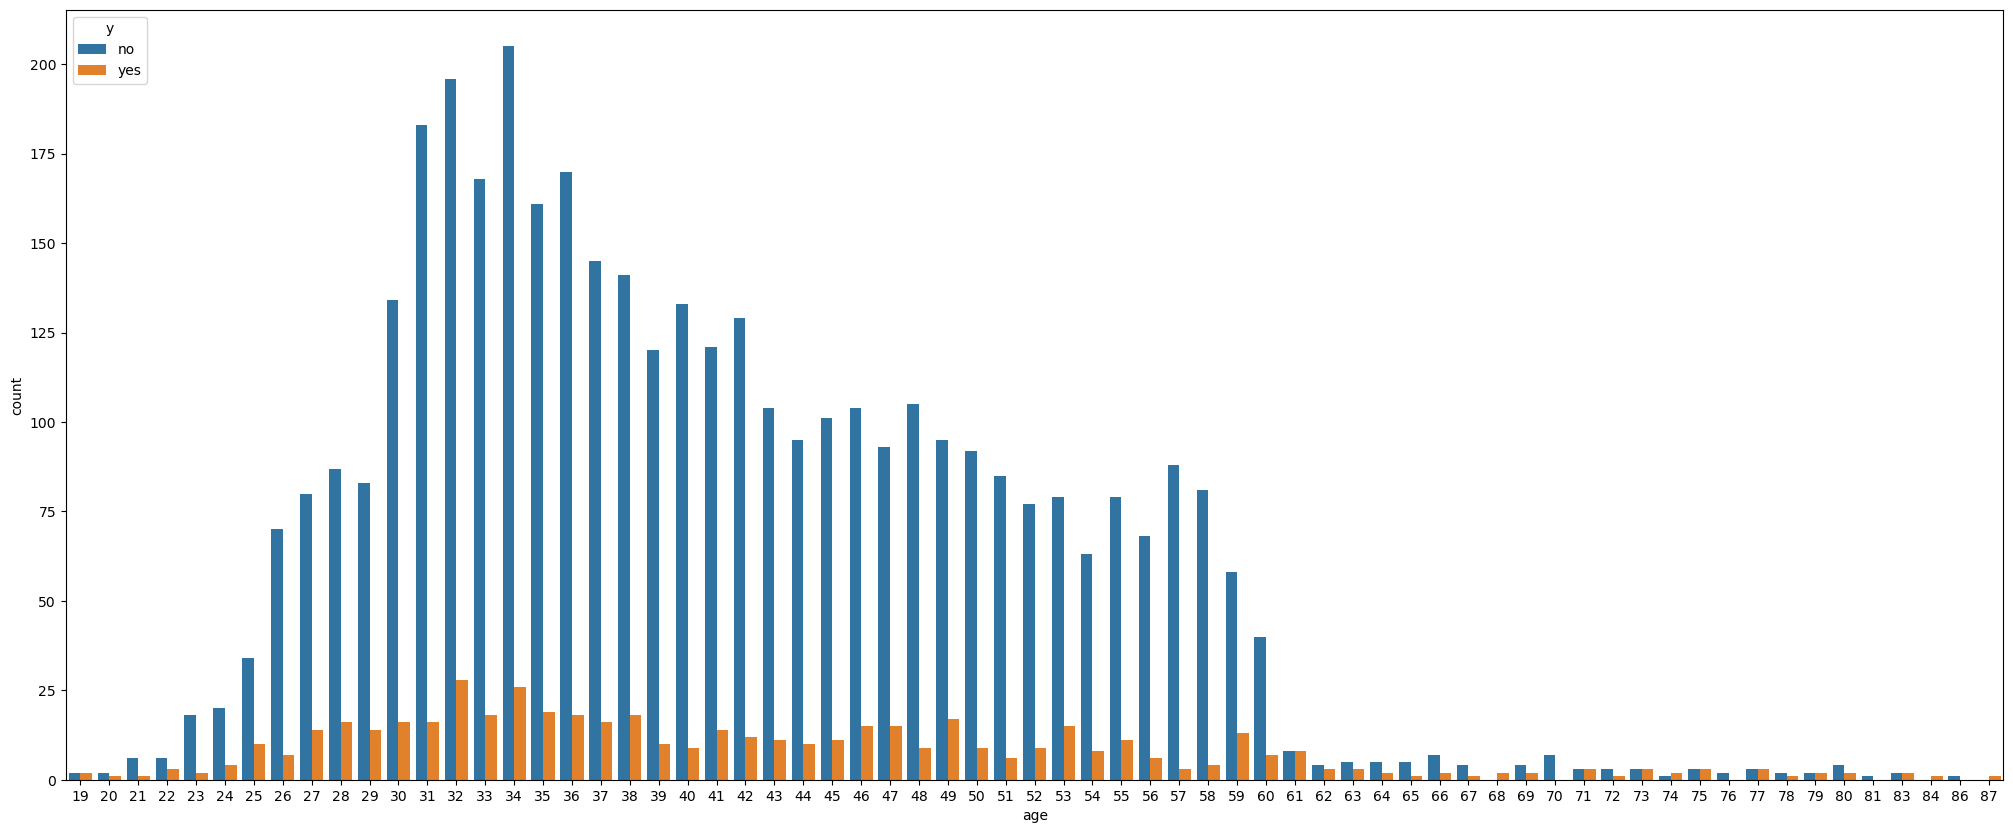

In [35]:
#  Bivariate Analysis
plt.figure(figsize=(25,10))
sns.countplot('age', data=df,hue='y')

In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<AxesSubplot:xlabel='job', ylabel='count'>

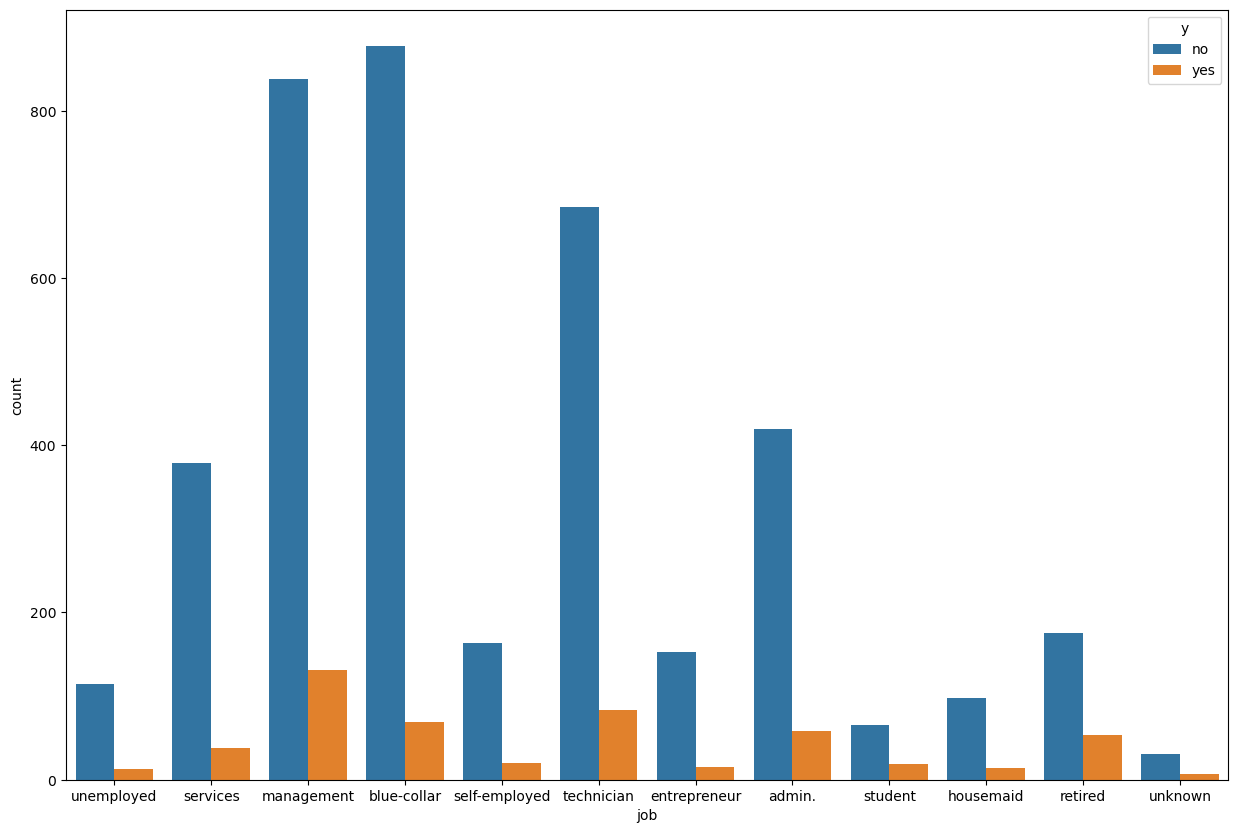

In [37]:
#  Bivariate Analysis
plt.figure(figsize=(15,10))
sns.countplot('job', data=df,hue='y')

<AxesSubplot:xlabel='marital', ylabel='count'>

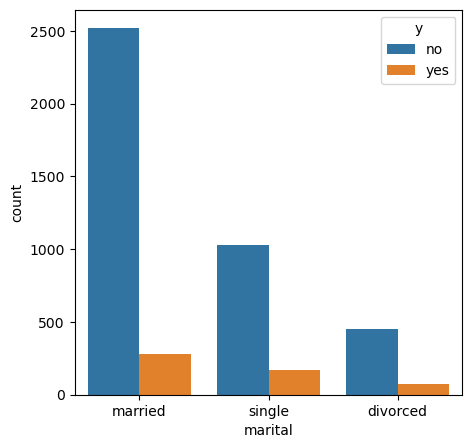

In [38]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('marital', data=df,hue='y')

<AxesSubplot:xlabel='education', ylabel='count'>

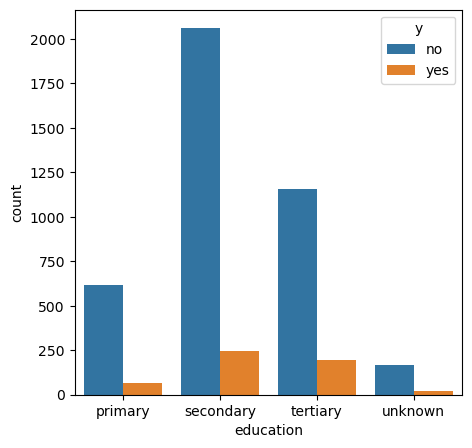

In [39]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('education', data=df,hue='y')

<AxesSubplot:xlabel='default', ylabel='count'>

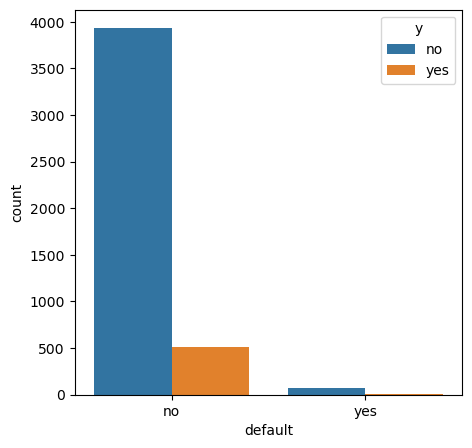

In [40]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('default', data=df,hue='y')

<AxesSubplot:xlabel='balance'>

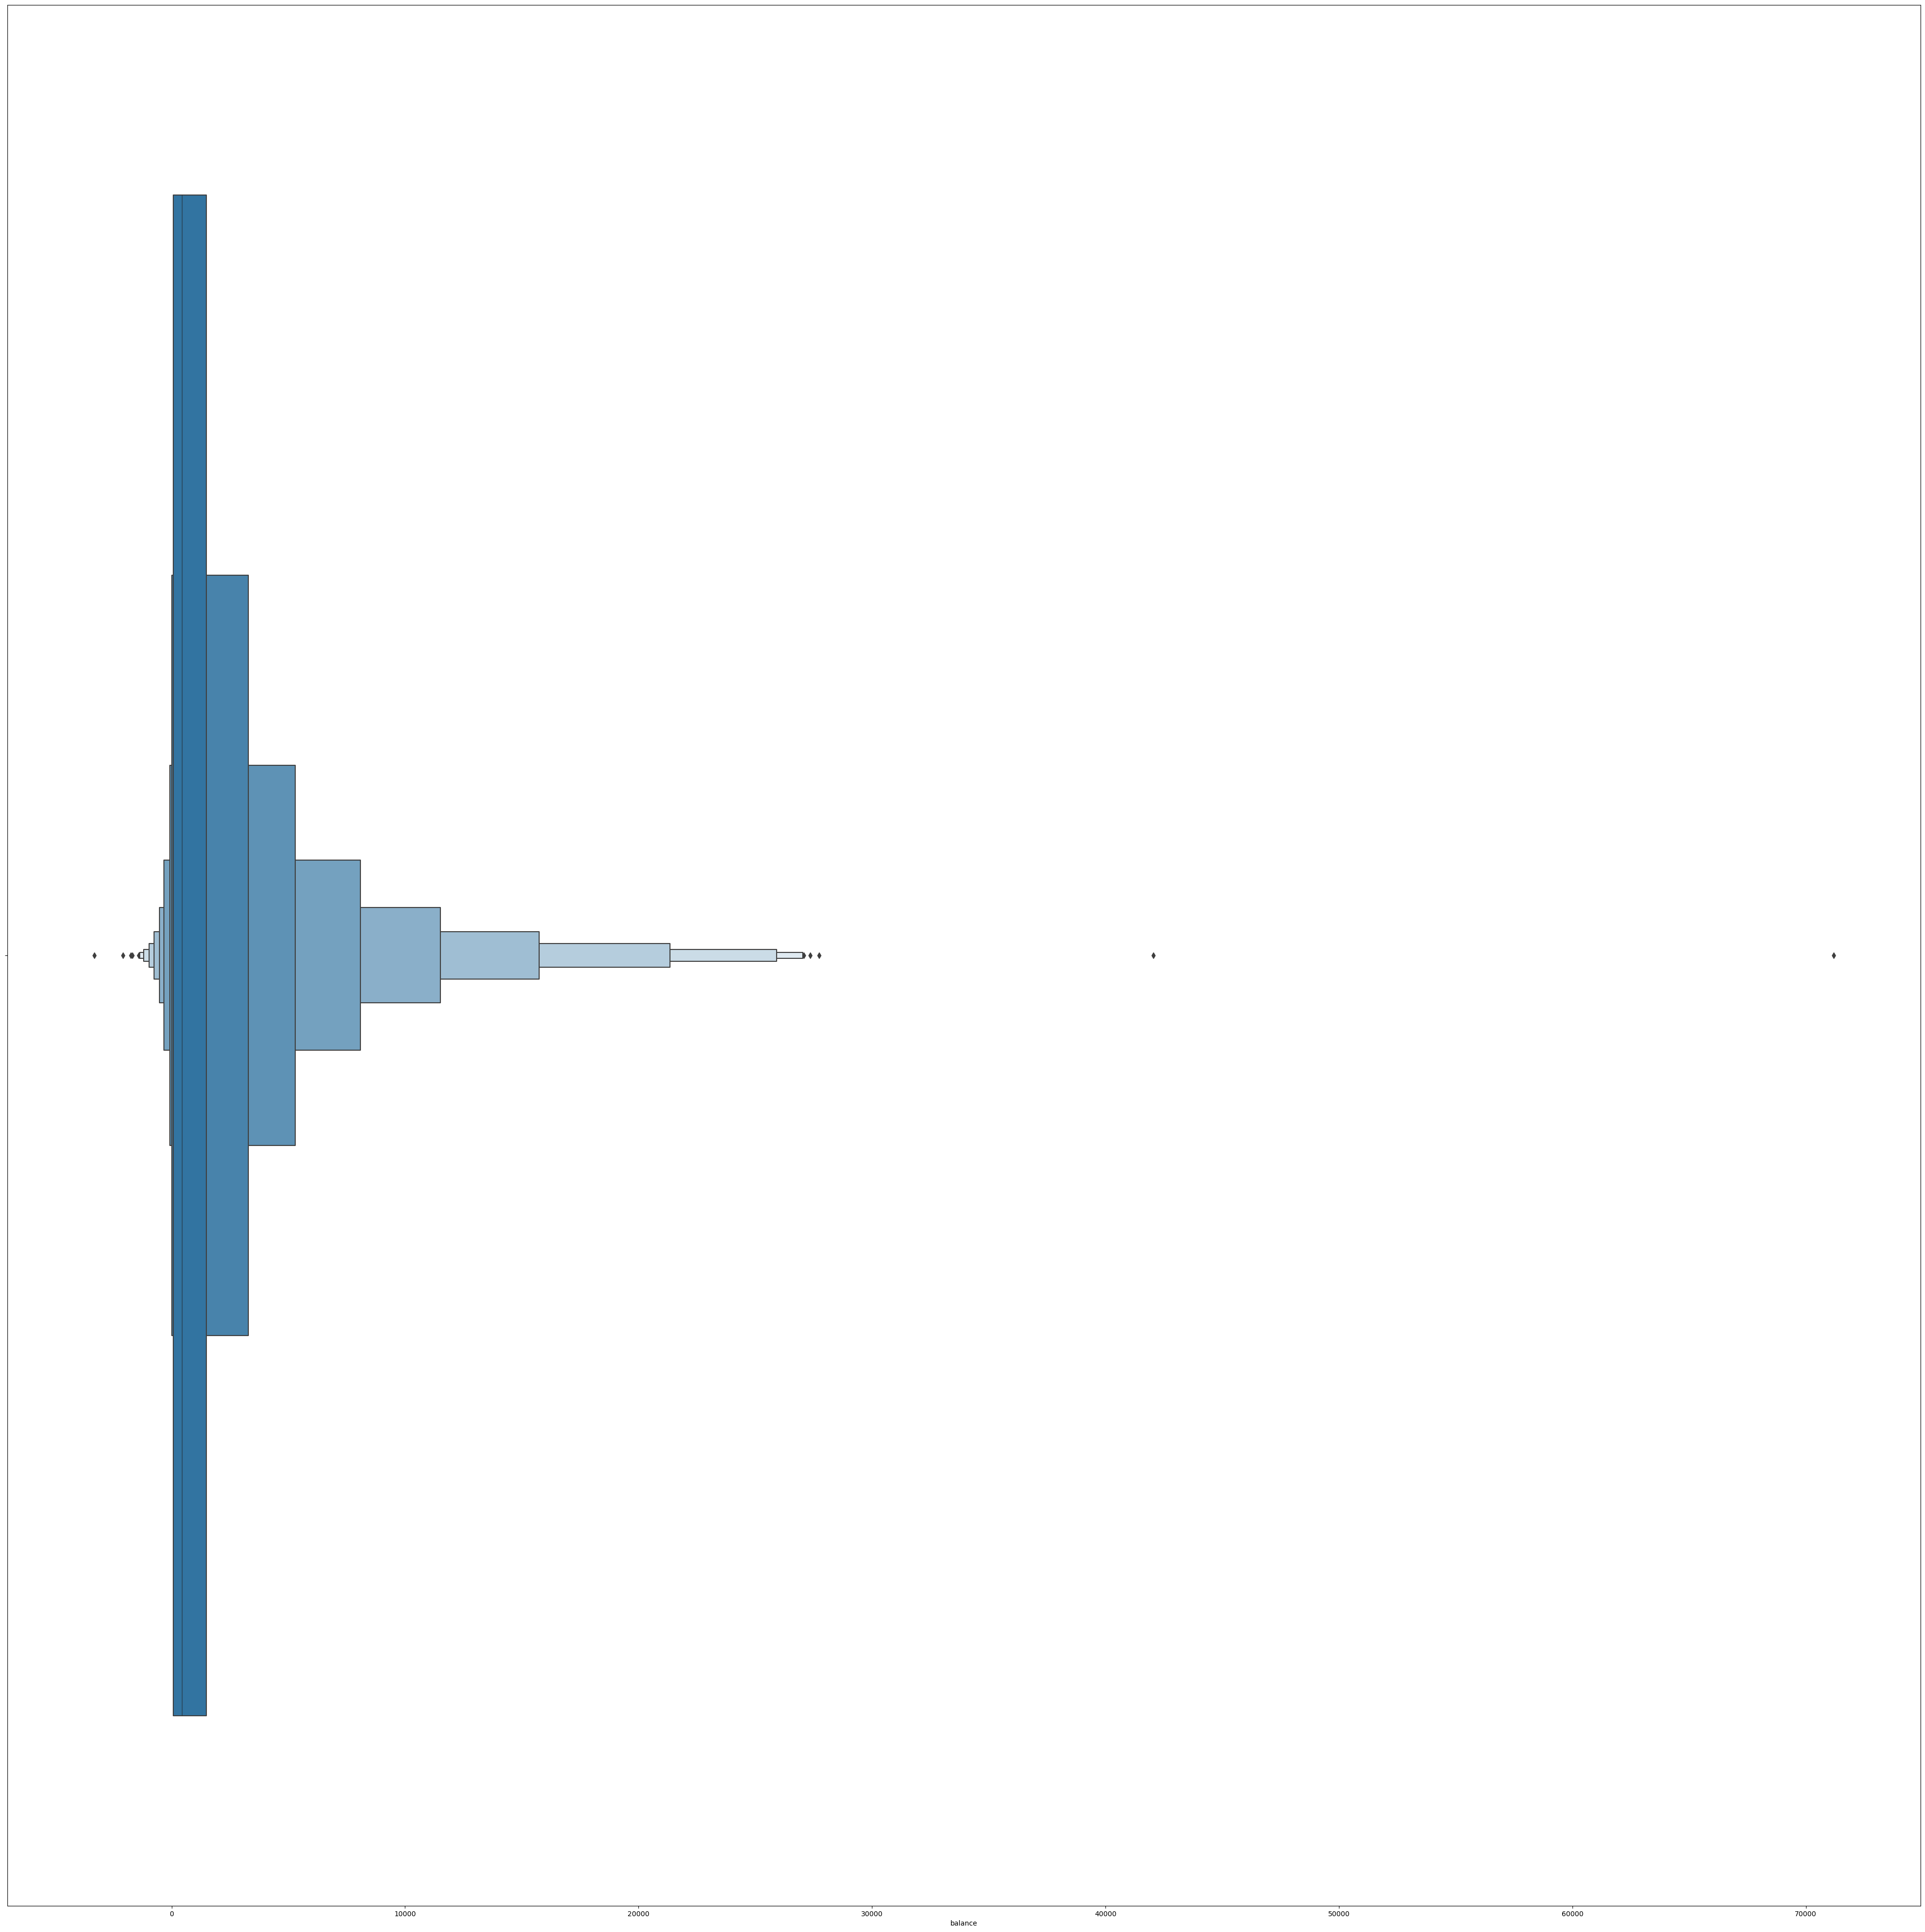

In [41]:
#  Bivariate Analysis
plt.figure(figsize=(50,50))
sns.boxenplot('balance', data=df,hue='y')

<AxesSubplot:xlabel='housing', ylabel='count'>

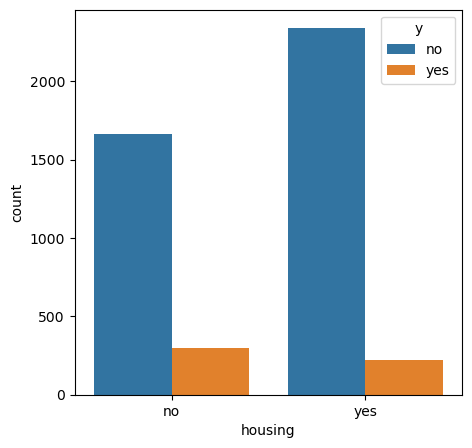

In [42]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('housing', data=df,hue='y')

In [43]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<AxesSubplot:xlabel='loan', ylabel='count'>

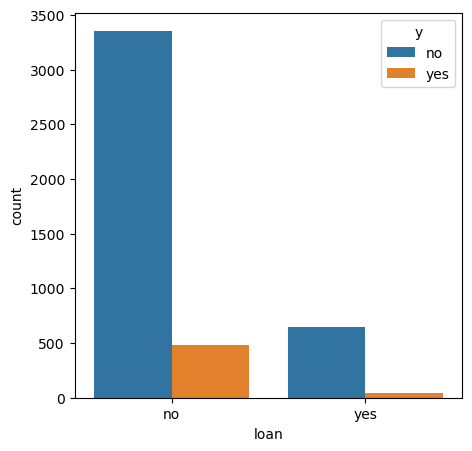

In [44]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('loan', data=df,hue='y')

<AxesSubplot:xlabel='contact', ylabel='count'>

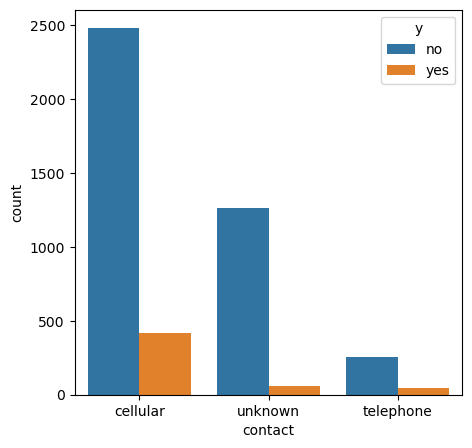

In [45]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('contact', data=df,hue='y')

<AxesSubplot:xlabel='day', ylabel='count'>

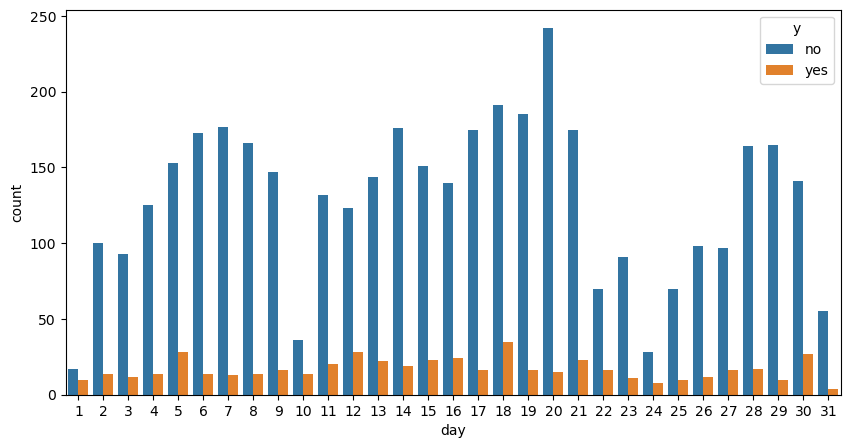

In [46]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('day', data=df,hue='y')

<AxesSubplot:xlabel='month', ylabel='count'>

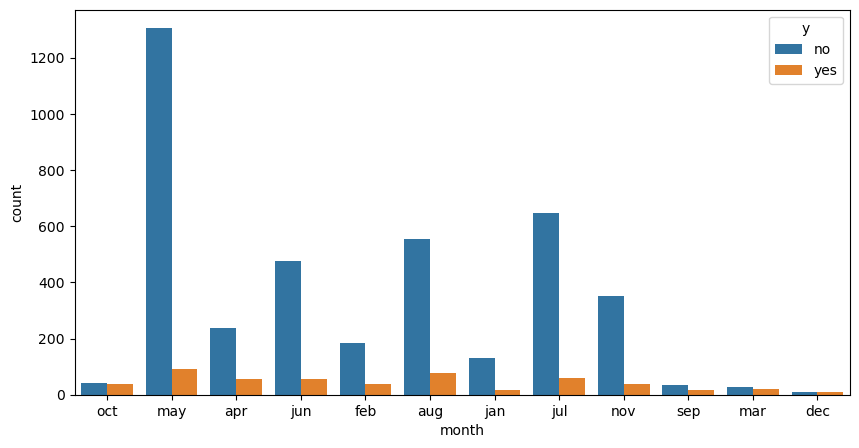

In [47]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('month', data=df,hue='y')

<AxesSubplot:xlabel='duration'>

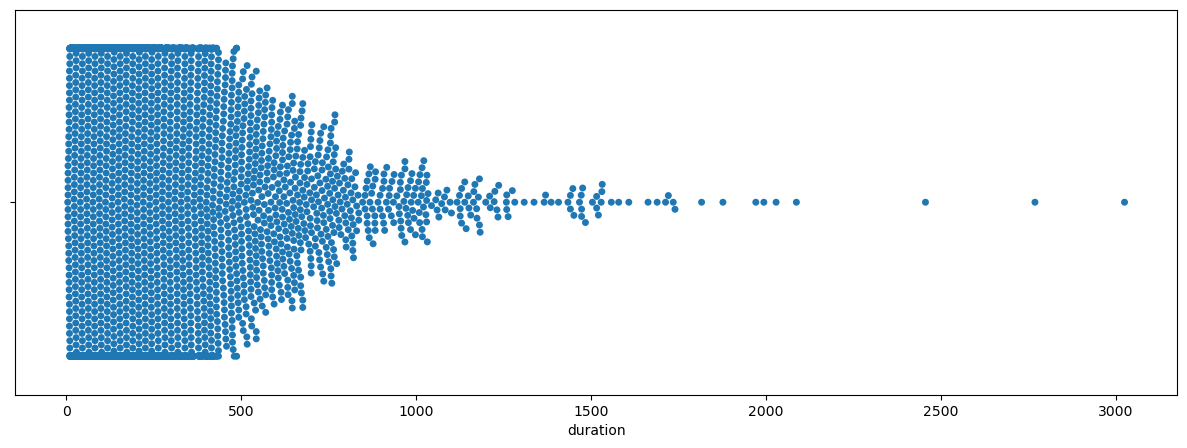

In [48]:
#  Bivariate Analysis
plt.figure(figsize=(15,5))
sns.swarmplot('duration', data=df,hue='y')

<AxesSubplot:xlabel='campaign', ylabel='count'>

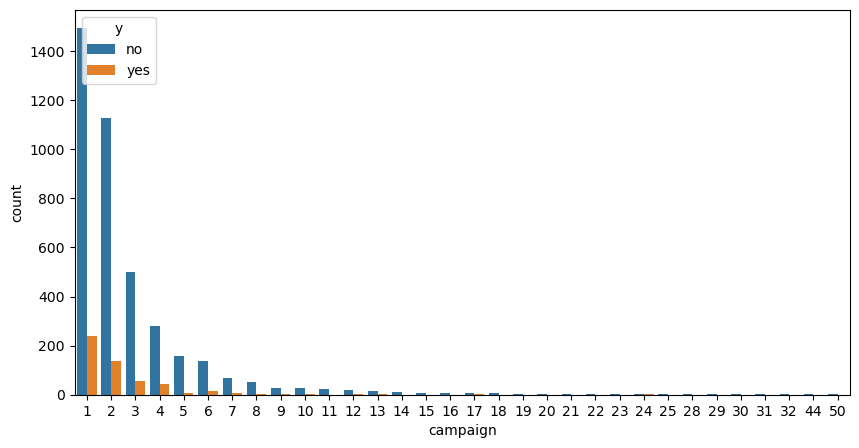

In [49]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('campaign', data=df,hue='y')

<AxesSubplot:xlabel='pdays', ylabel='count'>

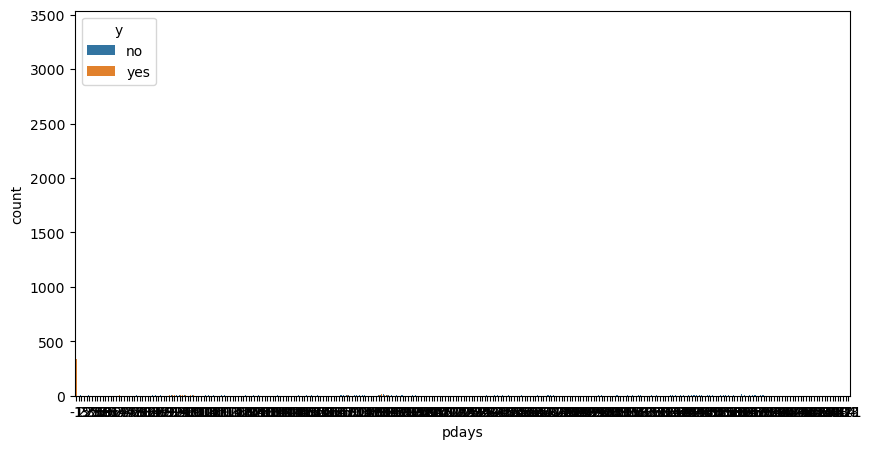

In [50]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('pdays', data=df,hue='y')

In [51]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<AxesSubplot:xlabel='previous', ylabel='count'>

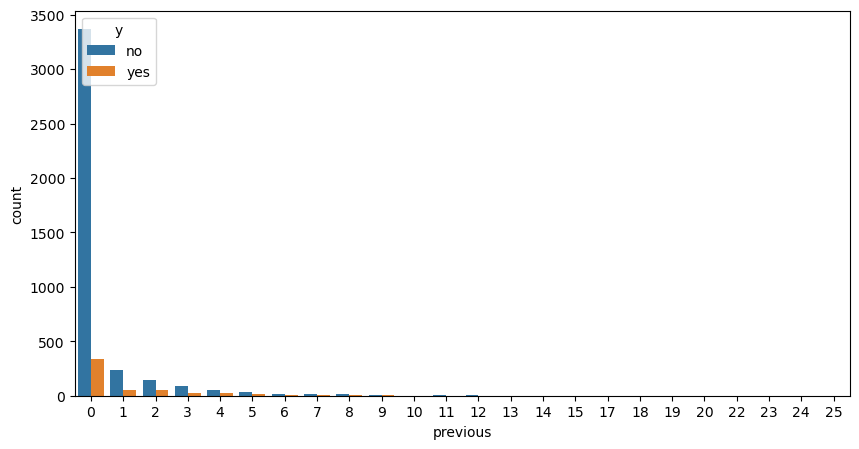

In [52]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('previous', data=df,hue='y')

<AxesSubplot:xlabel='poutcome', ylabel='count'>

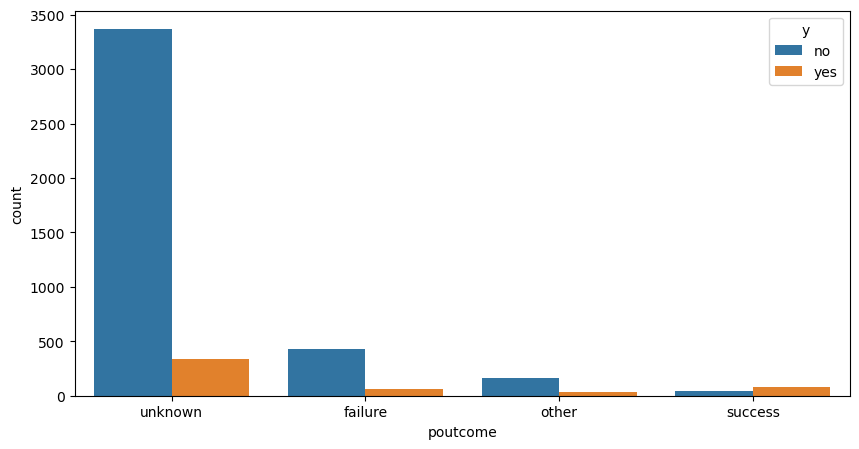

In [53]:
#  Bivariate Analysis
plt.figure(figsize=(10,5))
sns.countplot('poutcome', data=df,hue='y')

<AxesSubplot:xlabel='y', ylabel='count'>

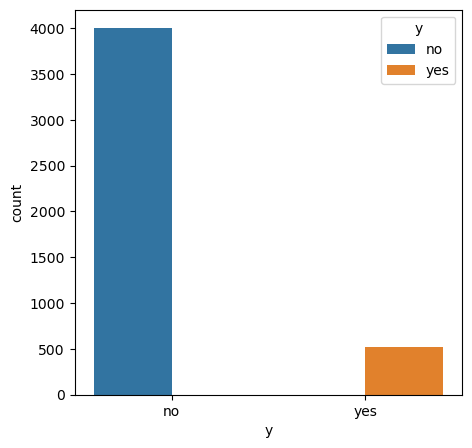

In [55]:
#  Bivariate Analysis
plt.figure(figsize=(5,5))
sns.countplot('y', data=df,hue='y')

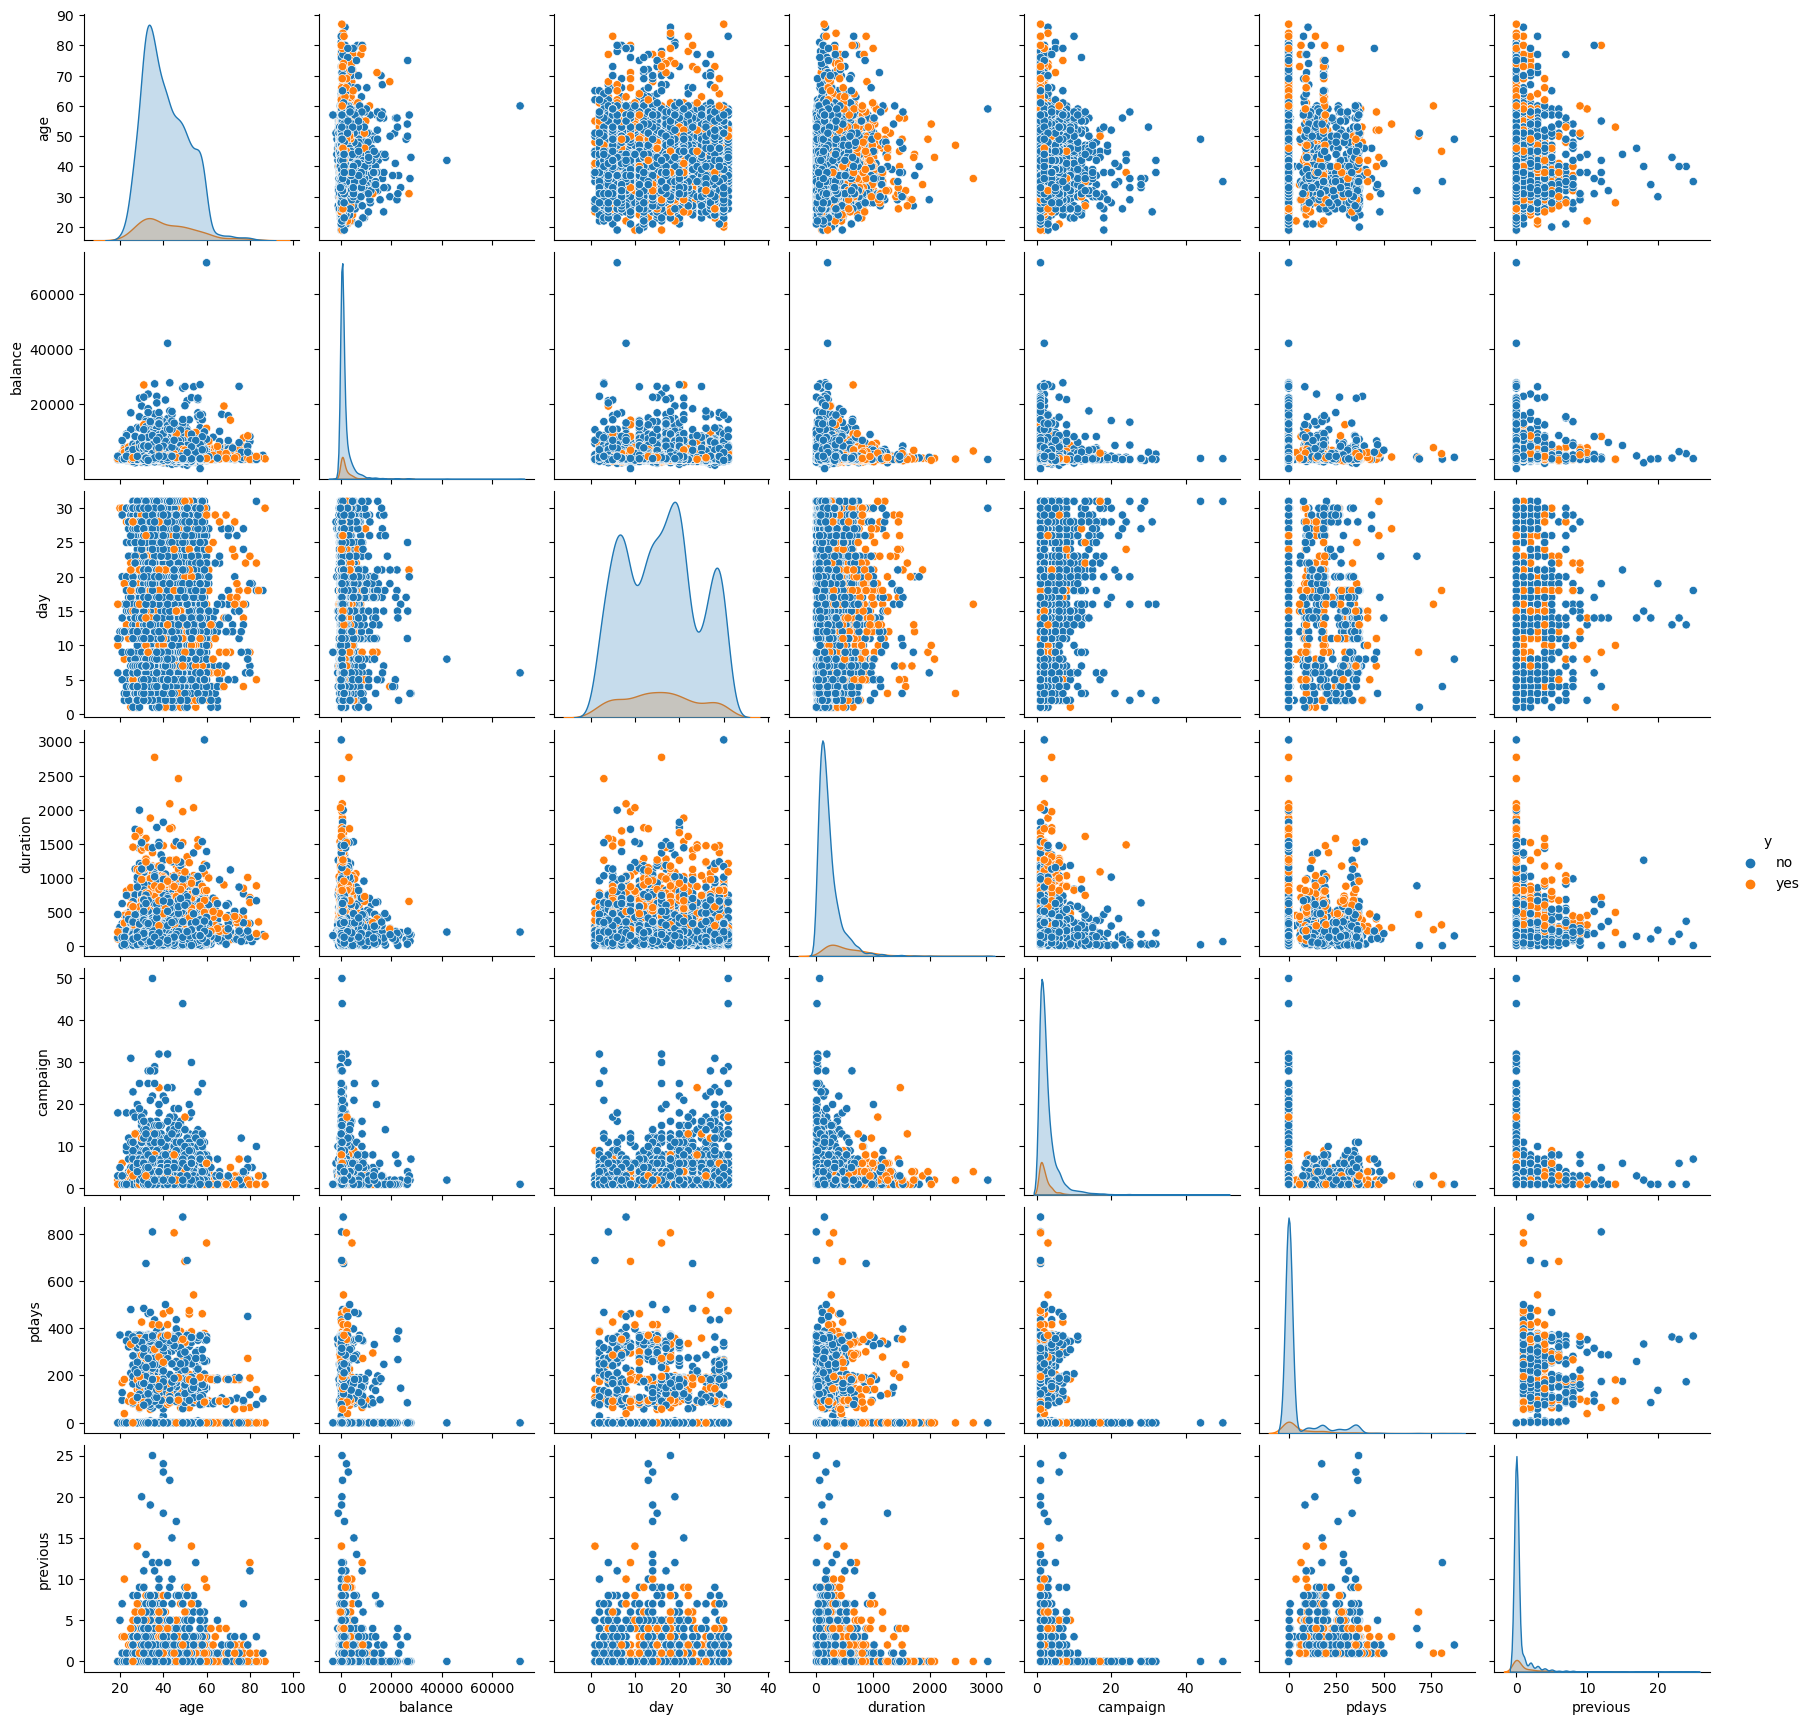

In [56]:
sns.pairplot(df,hue='y')

In [57]:
#   Label Encoding
df.dtypes
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [60]:
enc

LabelEncoder()

In [62]:
df.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

In [63]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [64]:
#  Checking Correlation
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


In [65]:
df.corr()['y'].sort_values()

contact     -0.133595
housing     -0.104683
poutcome    -0.082632
loan        -0.070517
campaign    -0.061147
month       -0.040933
day         -0.011244
default      0.001303
marital      0.015042
balance      0.017905
job          0.027401
education    0.042987
age          0.045092
pdays        0.104087
previous     0.116714
duration     0.401118
y            1.000000
Name: y, dtype: float64

We can observe :
All columns are sorted in ascending order showing least to strong correlation with target column. 
13 columns are negatively correlated and 7 columns are positively correlated. Column 'MonthlyCharges' 
is highly correlated with Target column 'Churn' and Column 'Contract' is least correlated with Target column 'Churn'.

<AxesSubplot:>

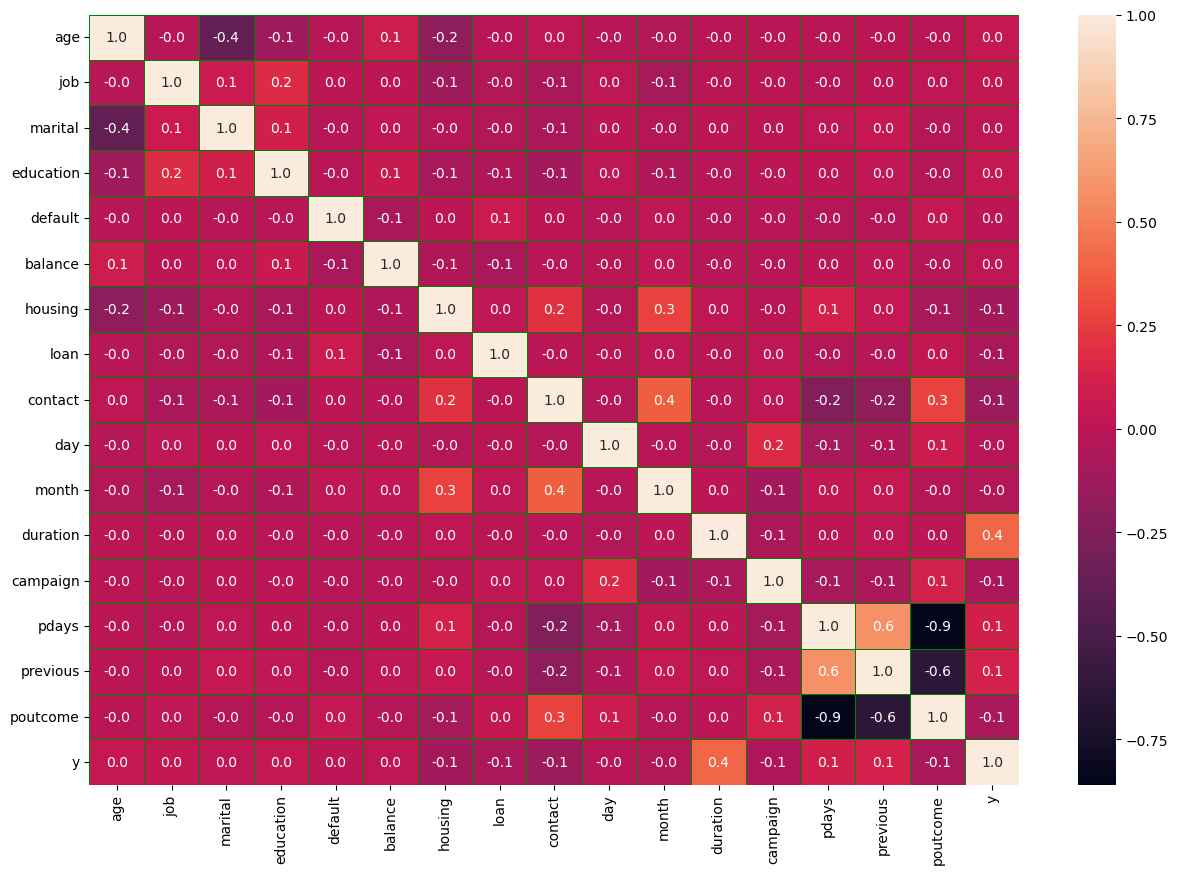

In [66]:
# Checking Correlation with Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='green',fmt='.1f')

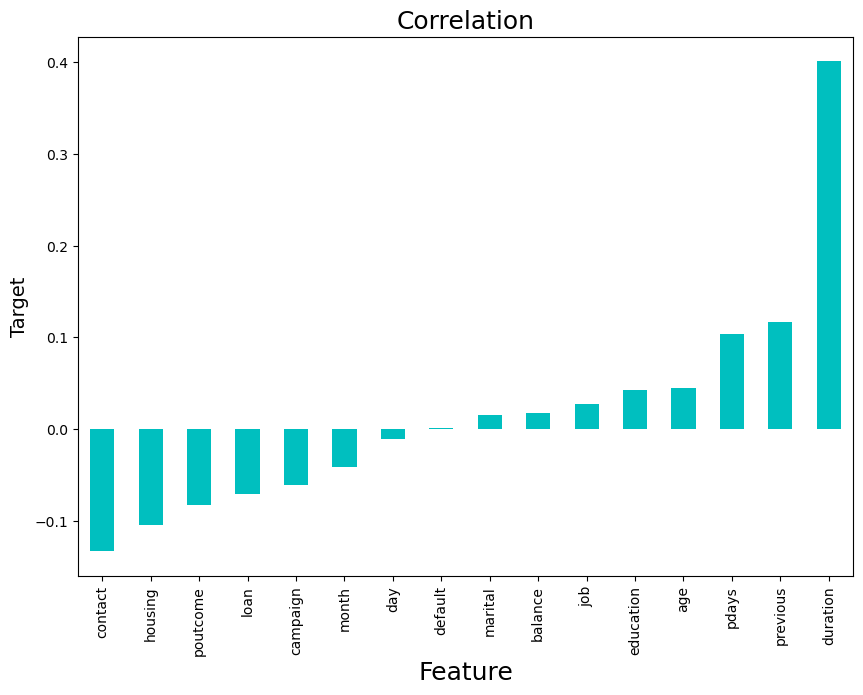

In [68]:
#  Checking Correlation with barplot
plt.figure(figsize=(10,7))
df.corr()['y'].sort_values(ascending=True).drop(['y']).plot(kind='bar',color = 'c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize = 18)
plt.show()

# Checking Outliers

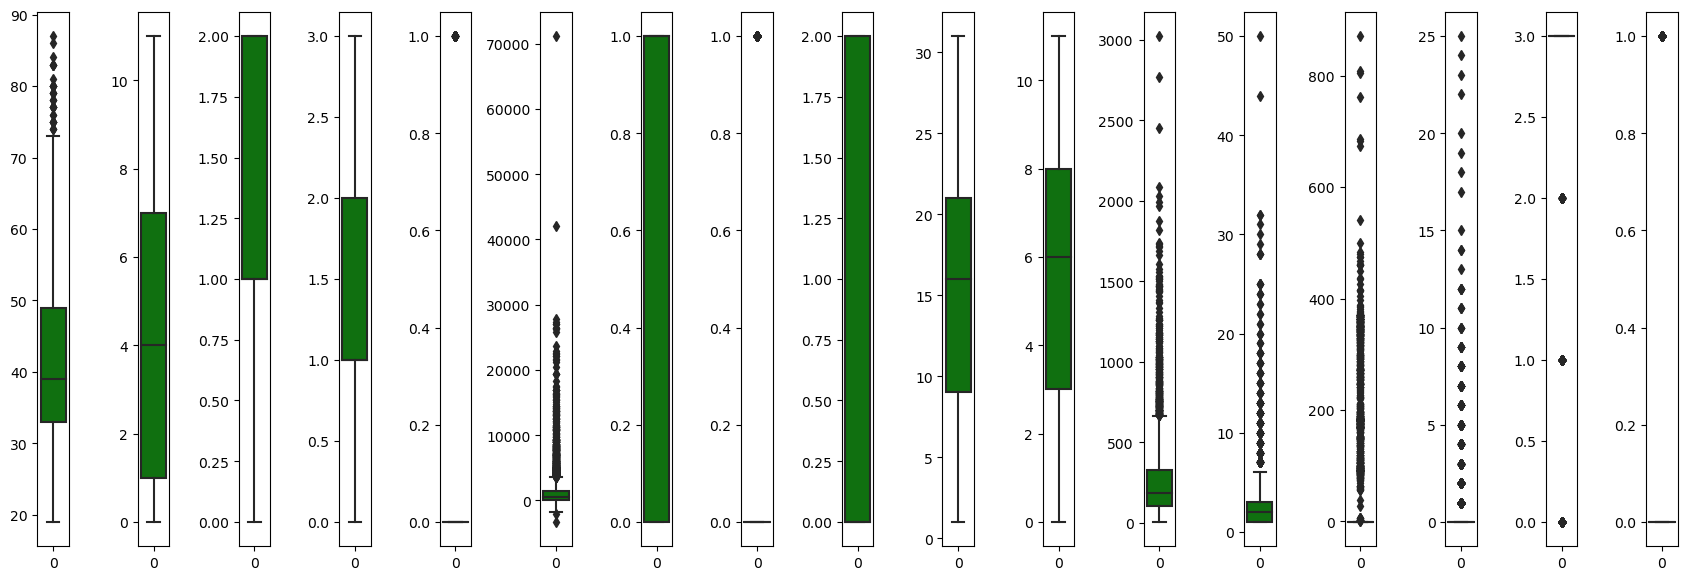

In [69]:
collist=df.columns.values
ncol=21
nrows=11
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=df[collist[column]],color='green',orient='v')
  #  plt.xlabel(column,frontsize = 15)
    plt.tight_layout()

In [70]:
df.skew()

age          0.699501
job          0.243758
marital     -0.068798
education    0.186229
default      7.519405
balance      6.596431
housing     -0.266522
loan         1.930177
contact      0.740129
day          0.094627
month       -0.503235
duration     2.772420
campaign     4.743914
pdays        2.717071
previous     5.875259
poutcome    -1.964286
y            2.410736
dtype: float64

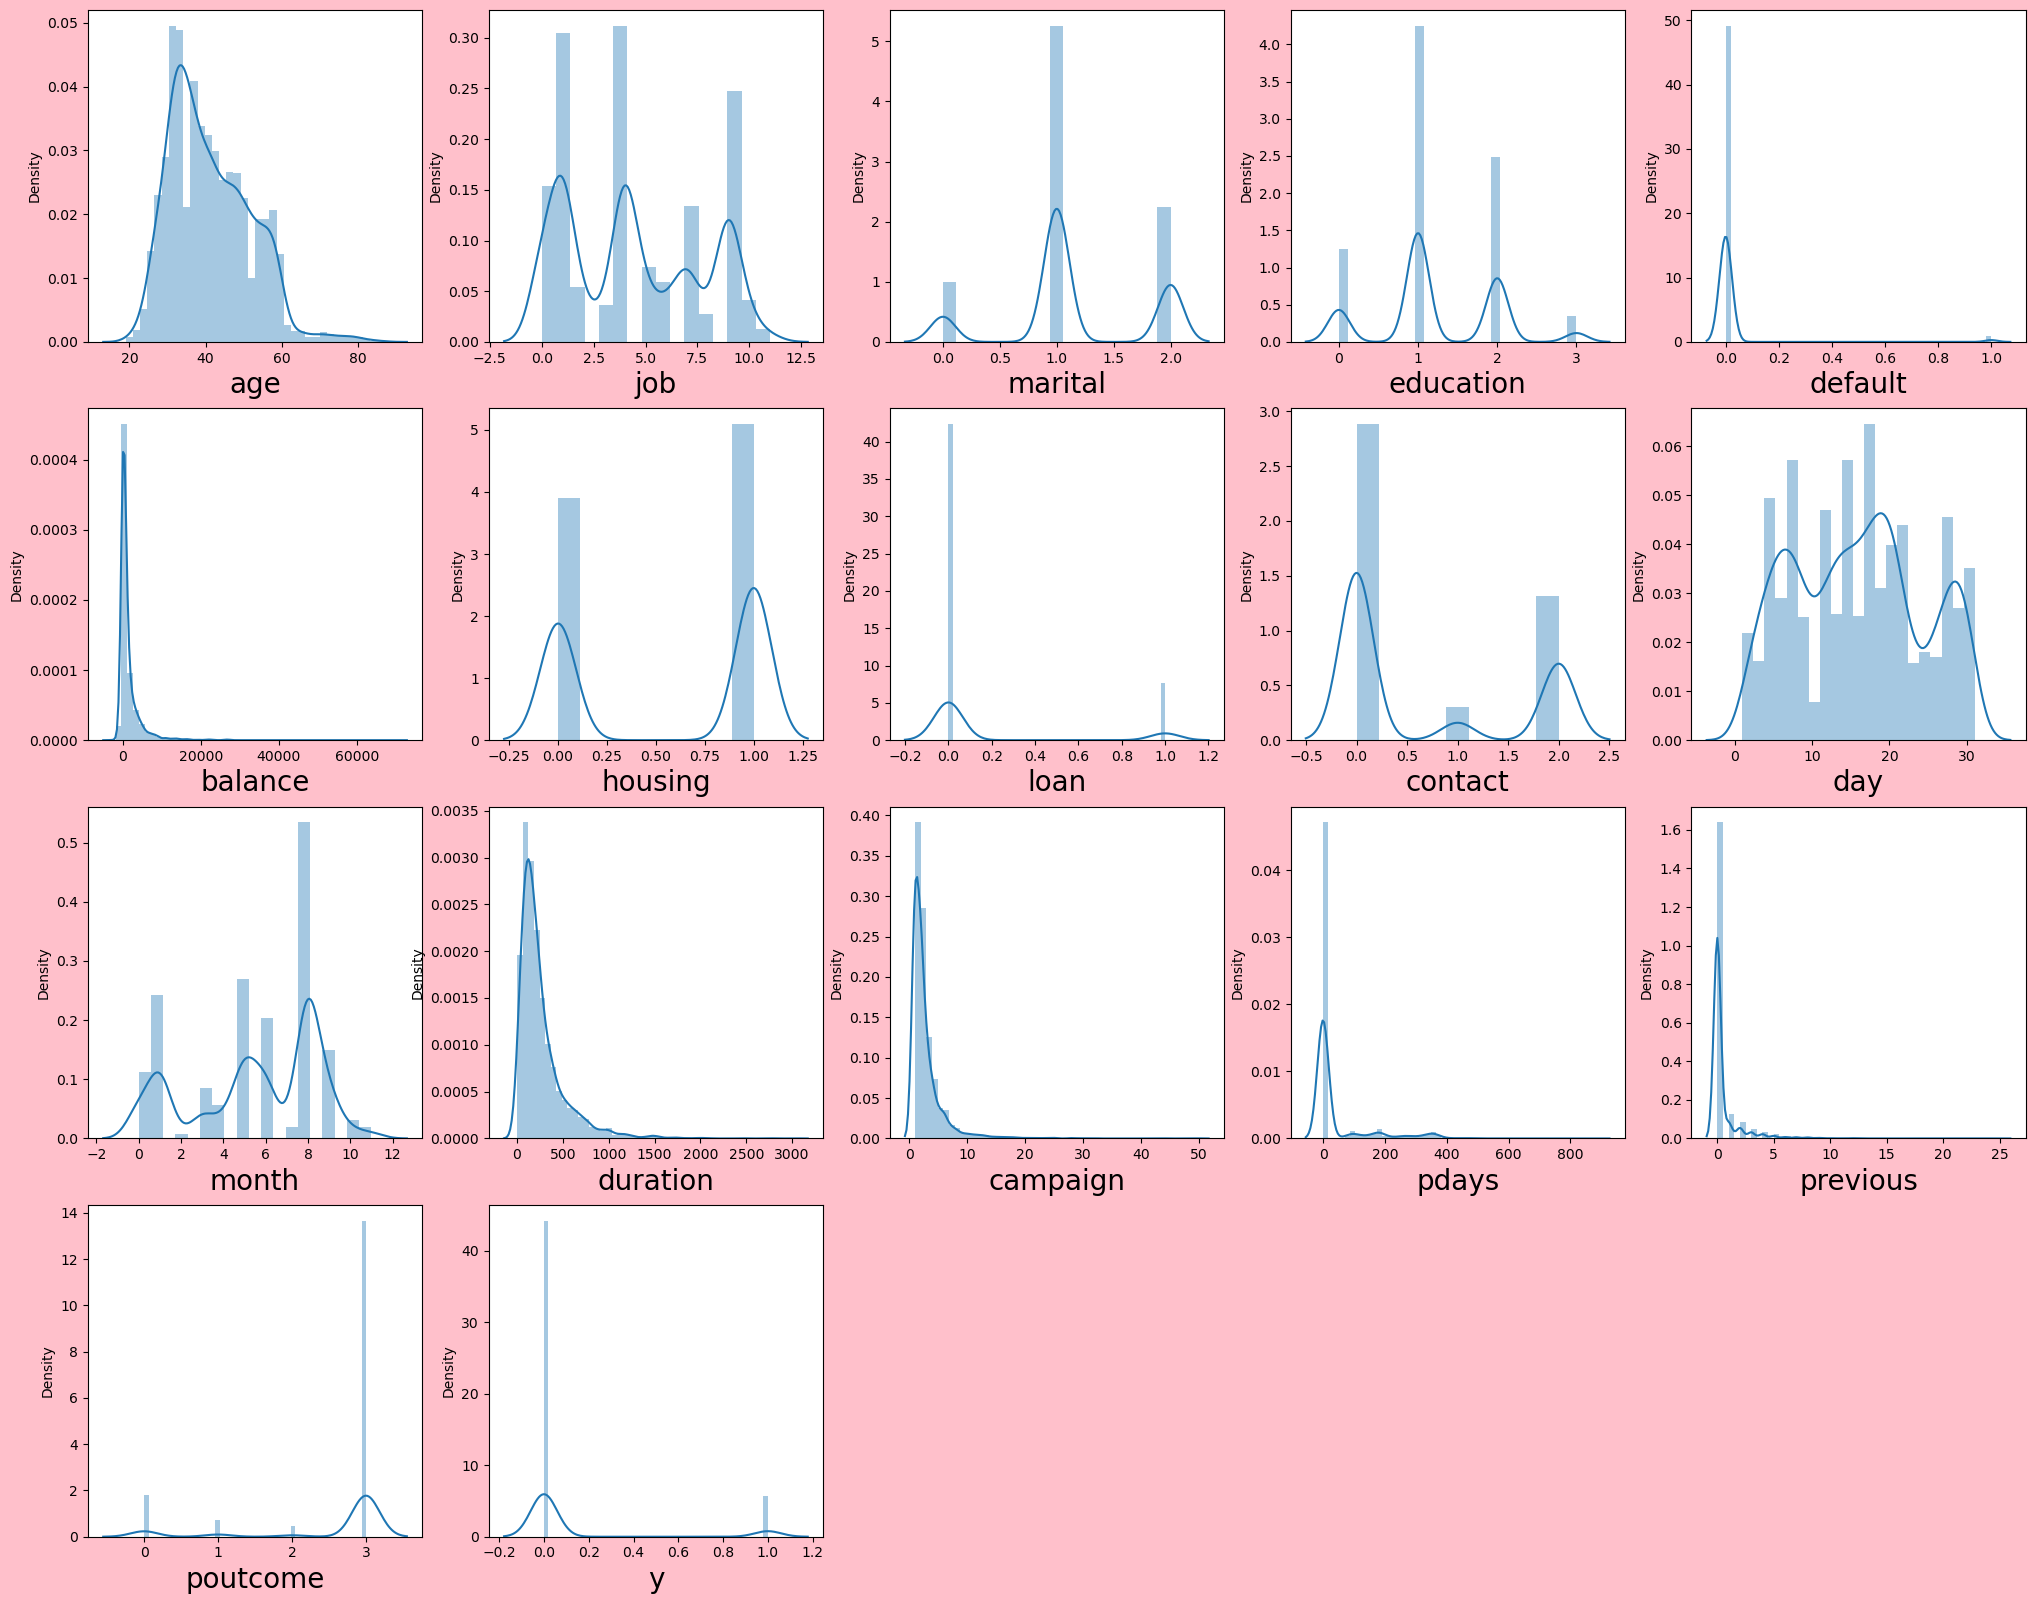

In [71]:
plt.figure(figsize=(25,25), facecolor='pink')
plotnumber = 1

for column in df:
    if plotnumber<=21:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [73]:
from sklearn.preprocessing import PowerTransformer

In [74]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [75]:
collist = ['poutcome']
df[collist]=power_transform(df[collist],method='yeo-johnson')
df[collist]

,poutcome
0,0.466958
1,-2.246026
2,-2.246026
3,0.466958
4,0.466958
...,...
4516,0.466958
4517,0.466958
4518,0.466958
4519,-2.157810


In [76]:
df.skew()

age          0.699501
job          0.243758
marital     -0.068798
education    0.186229
default      7.519405
balance      6.596431
housing     -0.266522
loan         1.930177
contact      0.740129
day          0.094627
month       -0.503235
duration     2.772420
campaign     4.743914
pdays        2.717071
previous     5.875259
poutcome    -1.696510
y            2.410736
dtype: float64

<AxesSubplot:xlabel='poutcome', ylabel='Density'>

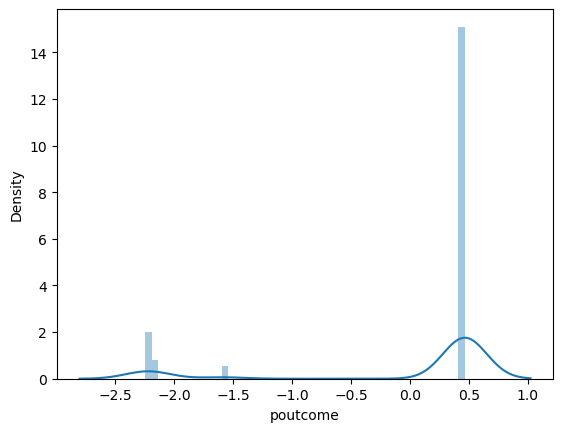

In [77]:
sns.distplot(df['poutcome'])

# Data preprocessing

In [78]:
x=df.drop("y",axis=1)
y=df["y"]

In [79]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [80]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0.466958
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,-2.246026
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,-2.246026
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0.466958
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0.466958


In [81]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [82]:
x.shape

(4521, 16)

In [83]:
y.shape

(4521,)

In [84]:
y.value_counts()

0    4000
1     521
Name: y, dtype: int64

In [86]:
pip install imblearn


     -------------------------------------- 226.0/226.0 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [87]:
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import SMOTE

In [88]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)
y.value_counts()

0    4000
1    4000
Name: y, dtype: int64

# Scaling data using Standard Scaler

In [89]:
scaler = StandardScaler()

In [90]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [91]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.068426,1.921701,-0.044815,-1.621808,-0.097934,0.120203,-0.815434,-0.314005,-0.569798,0.448584,1.652940,-0.896323,-0.543517,-0.482815,-0.396415,0.588231
1,-0.789612,0.903851,-0.044815,-0.195259,-0.097934,1.245694,1.226341,3.184660,-0.569798,-0.594900,0.966592,-0.482747,-0.543517,2.805474,1.973335,-2.045413
2,-0.603737,-0.113999,1.630519,1.231290,-0.097934,-0.043634,1.226341,-0.314005,-0.569798,0.057278,-1.778799,-0.585408,-0.543517,2.718431,0.196023,-2.045413
3,-1.068426,-0.113999,-0.044815,1.231290,-0.097934,0.003605,1.226341,3.184660,2.021667,-1.638385,0.280244,-0.544343,0.602639,-0.482815,-0.396415,0.588231
4,1.626774,-1.131849,-0.044815,-0.195259,-0.097934,-0.549768,1.226341,-0.314005,2.021667,-1.377514,0.966592,-0.465148,-0.543517,-0.482815,-0.396415,0.588231


In [92]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.068426,1.921701,-0.044815,-1.621808,-0.097934,0.120203,-0.815434,-0.314005,-0.569798,0.448584,1.652940,-0.896323,-0.543517,-0.482815,-0.396415,0.588231
1,-0.789612,0.903851,-0.044815,-0.195259,-0.097934,1.245694,1.226341,3.184660,-0.569798,-0.594900,0.966592,-0.482747,-0.543517,2.805474,1.973335,-2.045413
2,-0.603737,-0.113999,1.630519,1.231290,-0.097934,-0.043634,1.226341,-0.314005,-0.569798,0.057278,-1.778799,-0.585408,-0.543517,2.718431,0.196023,-2.045413
3,-1.068426,-0.113999,-0.044815,1.231290,-0.097934,0.003605,1.226341,3.184660,2.021667,-1.638385,0.280244,-0.544343,0.602639,-0.482815,-0.396415,0.588231
4,1.626774,-1.131849,-0.044815,-0.195259,-0.097934,-0.549768,1.226341,-0.314005,2.021667,-1.377514,0.966592,-0.465148,-0.543517,-0.482815,-0.396415,0.588231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.697395,-1.471132,-0.044815,-1.621808,-0.097934,-0.425296,-0.815434,-0.314005,-0.569798,1.100762,-0.749277,-0.110235,-0.161465,0.890529,0.788460,-1.643123
7996,-0.882550,-1.471132,-0.044815,-0.195259,-0.097934,0.895524,-0.815434,-0.314005,-0.569798,1.100762,-1.778799,-0.550210,-0.543517,-0.482815,-0.396415,0.588231
7997,0.790333,1.582417,-0.044815,-0.195259,-0.097934,-0.477035,-0.815434,-0.314005,-0.569798,-0.073158,-0.749277,-0.476880,-0.543517,0.184514,1.973335,-1.967270
7998,0.976209,-0.453282,-0.044815,-1.621808,-0.097934,-0.511152,-0.815434,-0.314005,0.725934,-1.377514,-0.062930,0.925173,-0.543517,-0.482815,-0.396415,0.588231


In [93]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [94]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [95]:
x.columns[var_threshold.get_support()]

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [96]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


# SelectKBest method

In [97]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [98]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [99]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

      Feature        Score
11   duration  2195.928285
6     housing  1337.362834
8     contact   988.818734
7        loan   545.931718
2     marital   323.850746
15   poutcome   276.815230
12   campaign   232.176969
10      month   154.481952
13      pdays   126.774786
3   education   113.374402
14   previous   111.444371
4     default    44.927482


# VIF (Variance Inflation factor)

In [100]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF values,features
0,1.240688,age
1,1.039786,job
2,1.190763,marital
3,1.074530,education
4,1.013899,default
5,1.042682,balance
6,1.213934,housing
7,1.039182,loan
8,1.324392,contact
9,1.036097,day


In [101]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF Values,features
0,1.240688,age
1,1.039786,job
2,1.190763,marital
3,1.074530,education
4,1.013899,default
5,1.042682,balance
6,1.213934,housing
7,1.039182,loan
8,1.324392,contact
9,1.036097,day


# Creating Model

In [111]:
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is :- ', maxAccu, 'on Random State :- ',maxRS)

Best Accuracy is :-  0.9008333333333334 on Random State :-  26


# Creating train-test-split

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.15,random_state=maxRS)

In [113]:
x.shape

(8000, 16)

In [114]:
y.shape

(8000,)

In [115]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((6800, 16), (6800,), (1200, 16), (1200,))

# Logistic Regression

In [117]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)

print('Accuracy Score:- ', accuracy_score(y_test,pred_lr))

print('Confusion Matrix :- \n ', confusion_matrix(y_test,pred_lr))

print('Classification Report :- \n ',classification_report(y_test,pred_lr))

Accuracy Score:-  0.855
Confusion Matrix :- 
  [[484  88]
 [ 86 542]]
Classification Report :- 
                precision    recall  f1-score   support

           0       0.85      0.85      0.85       572
           1       0.86      0.86      0.86       628

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



# Here we are getting 85% accuracy using Logistic Regression.

# Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic Regressior Prediction Confusion Maxtrix ')

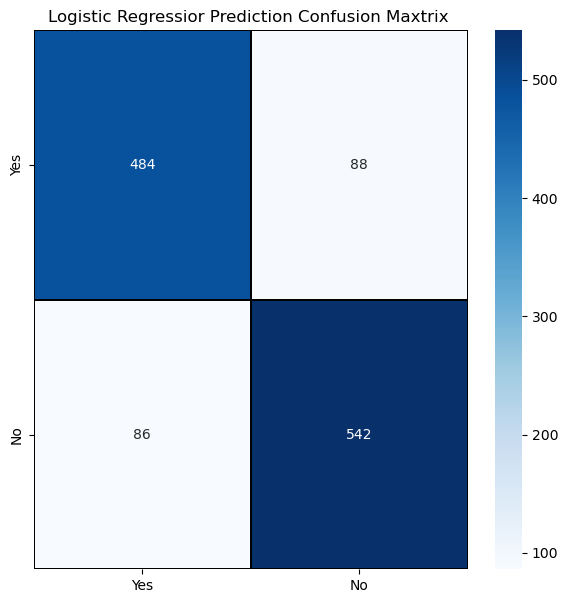

In [118]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ['Yes', 'No']
y_axis_labels = ['Yes', 'No']
f,ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm,annot = True, linewidths=.2,linecolor='black',fmt= '.0f',ax=ax, cmap = 'Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Logistic Regressior Prediction Confusion Maxtrix ')

# Classification Algorithms

# Random Forest Classifier

In [119]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print('Random Forest Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_rfc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_rfc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_rfc))

Random Forest Accuracy Score is:- 
 
   0.9441666666666667

 Confusion Matrix is :-
   [[528  44]
 [ 23 605]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.96      0.92      0.94       572
           1       0.93      0.96      0.95       628

    accuracy                           0.94      1200
   macro avg       0.95      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



# Confusion Matrix for Random Forest Classifier.

Text(0.5, 1.0, 'RFC Prediction Confusion Matrix')

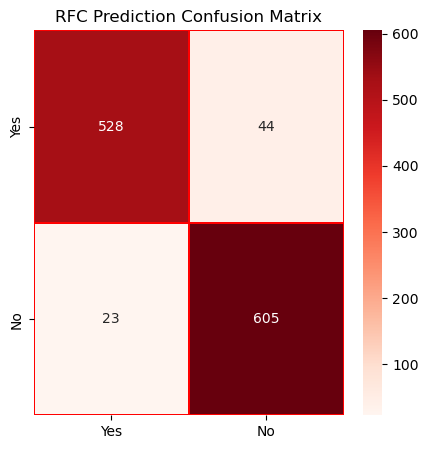

In [120]:
cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='red',fmt = '.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title ('RFC Prediction Confusion Matrix')

# Decision Tree Classifier

In [121]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)


print('Decision Tree Classifier Accuracy Score is:- \n \n  ',accuracy_score(y_test,pred_dtc))
print('\n Confusion Matrix is :-\n  ', confusion_matrix(y_test,pred_dtc))
print('\n Classification Report is \n  ', classification_report(y_test,pred_dtc))

Decision Tree Classifier Accuracy Score is:- 
 
   0.8983333333333333

 Confusion Matrix is :-
   [[509  63]
 [ 59 569]]

 Classification Report is 
                 precision    recall  f1-score   support

           0       0.90      0.89      0.89       572
           1       0.90      0.91      0.90       628

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



Text(0.5, 1.0, 'DTC Prediction Confusion Matrix')

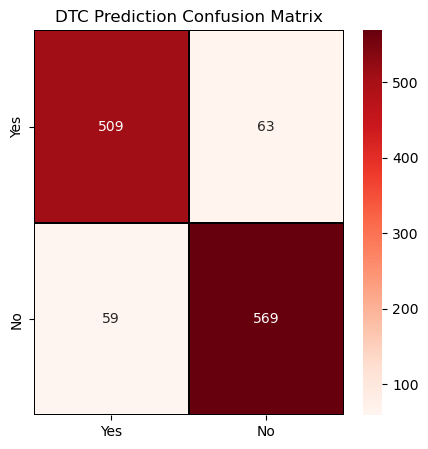

In [122]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('DTC Prediction Confusion Matrix')

# Support Vector Machine Classifier

In [123]:
svc = SVC(kernel='linear',gamma='scale')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print('Accuracy Score :- ',accuracy_score(y_test,pred_svc))
print('Confusion Matrix \n ' ,confusion_matrix(y_test,pred_svc))
print('classification Report \n :- ',confusion_matrix(y_test,pred_svc))

Accuracy Score :-  0.855
Confusion Matrix 
  [[474  98]
 [ 76 552]]
classification Report 
 :-  [[474  98]
 [ 76 552]]


Text(0.5, 1.0, 'SVM Classifier confusion_matrix')

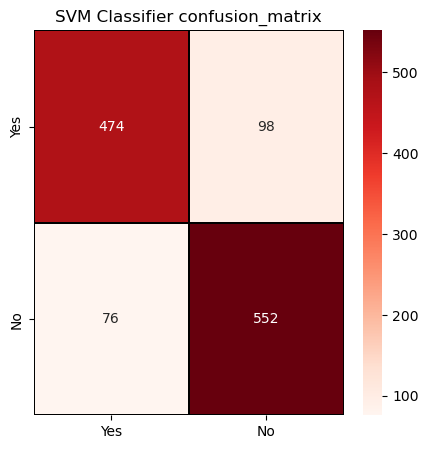

In [124]:
cm = confusion_matrix(y_test,pred_svc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels=y_axis_labels)
plt.title('SVM Classifier confusion_matrix')

# KNN Classifier

In [125]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print('Accuracy Score:- ',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:- ',confusion_matrix(y_test,pred_knn))
print('Classifier Report:- ', classification_report(y_test,pred_knn))

Accuracy Score:-  0.8958333333333334
Confusion Matrix:-  [[490  82]
 [ 43 585]]
Classifier Report:-                precision    recall  f1-score   support

           0       0.92      0.86      0.89       572
           1       0.88      0.93      0.90       628

    accuracy                           0.90      1200
   macro avg       0.90      0.89      0.90      1200
weighted avg       0.90      0.90      0.90      1200



Text(0.5, 1.0, 'KNN Classifier confusion Matrix')

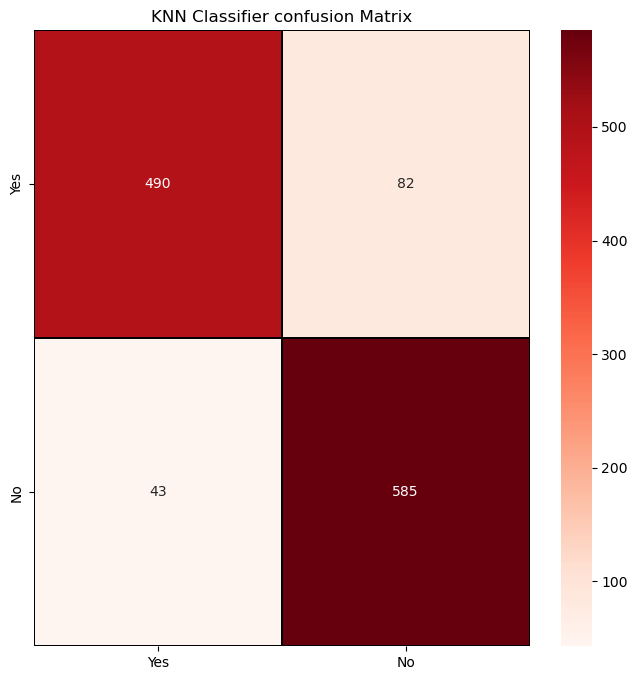

In [126]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ['Yes','No']
x_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(cm,annot=True,linewidths=.2,linecolor='black',fmt = '.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('KNN Classifier confusion Matrix')

# Gradient Boosting Classifier

In [127]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.8,max_depth=4)
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
print('GBC Accuracy Score is : ',accuracy_score(y_test,pred_gbc))
print('GBC Confusion Matrix \n',confusion_matrix(y_test,pred_gbc))
print('GBC Classification report \n',classification_report(y_test,pred_gbc))

GBC Accuracy Score is :  0.9408333333333333
GBC Confusion Matrix 
 [[528  44]
 [ 27 601]]
GBC Classification report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       572
           1       0.93      0.96      0.94       628

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



Text(0.5, 1.0, 'Confusion Matrix of GBC')

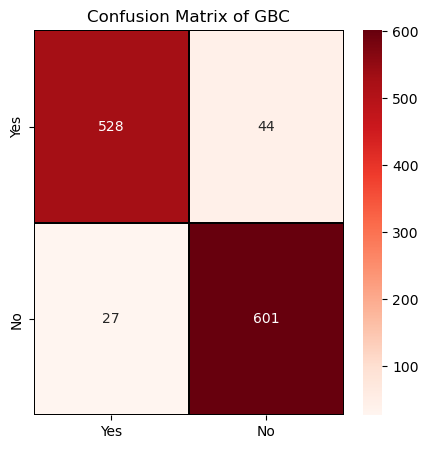

In [128]:
cm = confusion_matrix(y_test,pred_gbc)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='Reds',xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.title('Confusion Matrix of GBC')

# XGB Classifier

In [129]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)
print('The Accuracy of XGBC is: ',accuracy_score(y_test,pred_XGBC))
print('Confusion Matrix of XGBC :- \n ', confusion_matrix(y_test,pred_XGBC))
print('classification report of XGBC:- \n ', classification_report(y_test,pred_XGBC))

The Accuracy of XGBC is:  0.9458333333333333
Confusion Matrix of XGBC :- 
  [[531  41]
 [ 24 604]]
classification report of XGBC:- 
                precision    recall  f1-score   support

           0       0.96      0.93      0.94       572
           1       0.94      0.96      0.95       628

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

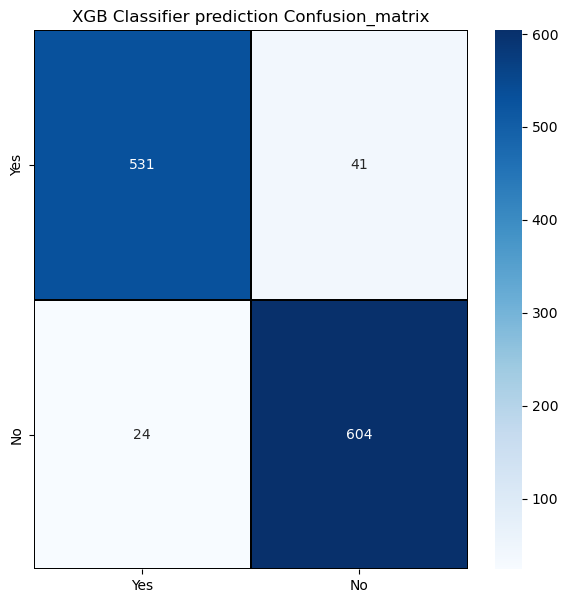

In [130]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")

# Cross Validation Score for all the model

In [131]:
#    CV Score for Logistic Regrassion 
print('CV Score for logistic Regression :- ',cross_val_score(lr,x,y,cv=5).mean())

#    CV Score for Random Forest Classifier

print('CV Score for Random Forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

#    CV Score for Decision tree Classifier

print('CV score for Decision Tree Classifier',cross_val_score(dtc,x,y,cv=5).mean())


#    CV Score for support vector Classifire

print('CV Score for Support Vector Classifier ',cross_val_score(svc,x,y,cv=5).mean())

#  CV Score for KNN classifier

print('CV Score for KNN Classifier',cross_val_score(knn,x,y,cv=5).mean())

#    CV Score for Gradian boosting Classifier

print('CV Score for Gradian Boosting Classifier',cross_val_score(gbc,x,y,cv=5).mean())

#   CV score for XGB Classifier

print('CV Score for XGB Classifier',cross_val_score(XGBC,x,y,cv=5).mean())

CV Score for logistic Regression :-  0.8391249999999999
CV Score for Random Forest Classifier:  0.928125
CV score for Decision Tree Classifier 0.883625
CV Score for Support Vector Classifier  0.8385
CV Score for KNN Classifier 0.883625
CV Score for Gradian Boosting Classifier 0.9164999999999999
CV Score for XGB Classifier 0.932


From the observation of accuracy and cross validation score and their difference we can predict that 
Random Forest Classifier is the best model.

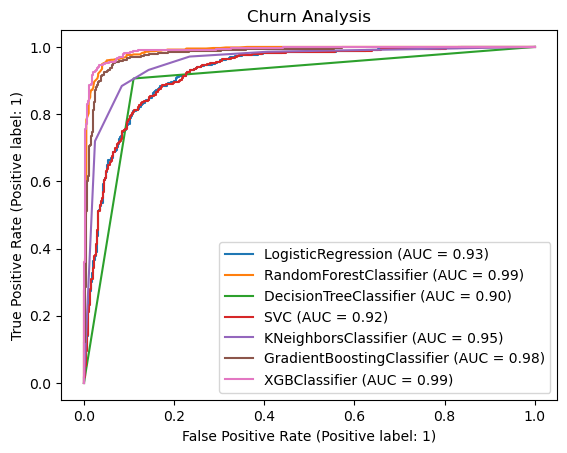

In [132]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(XGBC,x_test,y_test,ax=disp.ax_)

plt.title('Churn Analysis')
plt.legend(prop={'size' : 10},loc = 'lower right')
plt.show()

# Hyper Perametertuning for best model using GridsearchCV

# The XGB Classifier with GridsearchCV

In [133]:
from sklearn.model_selection import KFold

In [150]:
params = {
    
    'n_estimators' : [100,200,500],
    'learning_rate' : [0.01,0.05,0.01],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0,0.5,1],
    'reg_alpha' : [0,0.5,1],
    'reg_lambda': [0.5,1,5],
    'base_score': [0.2,0.5,1]
}

In [151]:
CV_XGBC = GridSearchCV(XGBClassifier(n_jobs=-1),params,n_jobs=-1,cv = KFold(n_splits=3),scoring='roc_auc')

In [152]:
CV_XGBC.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                        

In [153]:
CV_XGBC.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.05,
 'n_estimators': 500,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [154]:
CV_XGBC.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [155]:
bank = XGBClassifier(base_score=0.2,booster='gbtree',gamma=0.5,learning_rate=0.1,n_estimators = 500, reg_alpha=0.5,reg_lambda=1)

In [156]:
bank.fit(x_train,y_train)

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [158]:
pred=bank.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,pred))
print('\n  confusion matrix  \n',confusion_matrix(y_test,pred))
print('\n  Classification_matrix  \n',classification_report(y_test,pred))

Accuracy Score 0.9491666666666667

  confusion matrix  
 [[532  40]
 [ 21 607]]

  Classification_matrix  
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       572
           1       0.94      0.97      0.95       628

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



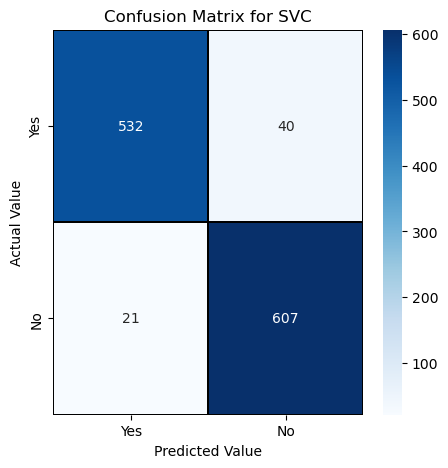

In [159]:
cm = confusion_matrix(y_test,pred)
x_axis_labels = ['Yes','No']
y_axis_labels = ['Yes','No']
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor='black',fmt = '.0f',ax=ax,cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix for SVC')
plt.show()

# Here the final model gives 95% accuracy after tuning.

#   ROC-AUC Curve

In [160]:
fpr,tpr,threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

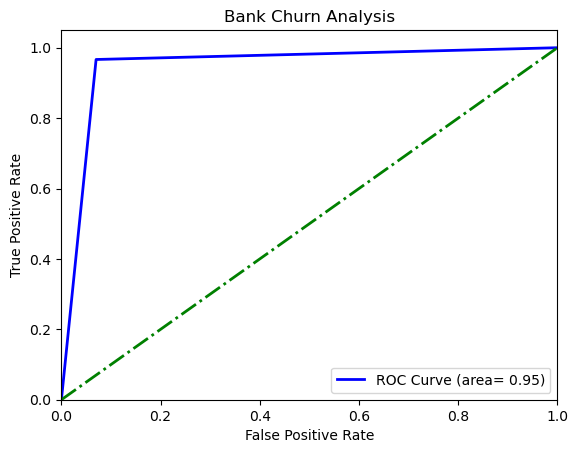

In [162]:
plt.figure()
plt.plot(fpr,tpr,color="blue",lw=2,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="green",lw=2,linestyle="dashdot")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bank Churn Analysis")
plt.legend(loc="lower right")
plt.show()

this is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.95.

# Saving the Model

In [166]:
import pickle
filename = 'Bank Churn_Analysis.pickle'
pickle.dump(CV_XGBC,open(filename,'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, ..., 1, 0, 0])

In [167]:
a = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
Customer_Churn_Analysis = pd.DataFrame({'Original': a, 'Predicted': predicted}, index=range(len(a)))
Customer_Churn_Analysis

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1195,0,0
1196,1,1
1197,1,1
1198,0,0
